<a href="https://colab.research.google.com/github/garkul/Transcriptomics.msu/blob/master/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Домашнее задание 2</h1>
<h3> Гаркуль Лидия 4 курс ФББ</h3>

<b>Задание:</b>
<b>1)</b> Сделайте NextFlow пайплайн, который будет подсчитывать принимать на вход аргументом список SRA-идентефикаторов эксперимента, а на выход давать подсчитанные экспрессии. Путь к индексу kallisto тоже будет подаваться на вход отдельно как аргумент. <br>

In [1]:
#загрузим kallisto
!git clone https://github.com/pachterlab/kallisto.git
!apt-get install autoconf
!cd kallisto && mkdir build && cd build && cmake .. && make

Cloning into 'kallisto'...
remote: Enumerating objects: 4136, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 4136 (delta 79), reused 117 (delta 67), pack-reused 3986
Receiving objects: 100% (4136/4136), 4.24 MiB | 16.09 MiB/s, done.
Resolving deltas: 100% (2694/2694), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  automake autotools-dev libsigsegv2 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc libtool gettext m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev libsigsegv2 m4
0 upgraded, 5 newly installed, 0 to remove and 12 not upgraded.
Need to get 1,082 kB of archives.
After this operation, 3,994 kB of additional disk

In [2]:
#загрузим SRA Toolkit
!wget https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/3.0.0/sratoolkit.3.0.0-ubuntu64.tar.gz
!tar -xvzf sratoolkit.3.0.0-ubuntu64.tar.gz

--2022-10-09 18:04:05--  https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/3.0.0/sratoolkit.3.0.0-ubuntu64.tar.gz
Resolving ftp-trace.ncbi.nlm.nih.gov (ftp-trace.ncbi.nlm.nih.gov)... 130.14.250.13, 130.14.250.11, 2607:f220:41e:250::11, ...
Connecting to ftp-trace.ncbi.nlm.nih.gov (ftp-trace.ncbi.nlm.nih.gov)|130.14.250.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85777118 (82M) [application/x-gzip]
Saving to: ‘sratoolkit.3.0.0-ubuntu64.tar.gz’

sratoolkit.3.0.0-ub 100%[===================>]  81.80M  64.0MB/s    in 1.3s    

2022-10-09 18:04:07 (64.0 MB/s) - ‘sratoolkit.3.0.0-ubuntu64.tar.gz’ saved [85777118/85777118]

sratoolkit.3.0.0-ubuntu64/
sratoolkit.3.0.0-ubuntu64/bin/
sratoolkit.3.0.0-ubuntu64/bin/abi-dump
sratoolkit.3.0.0-ubuntu64/bin/abi-dump.3
sratoolkit.3.0.0-ubuntu64/bin/abi-load
sratoolkit.3.0.0-ubuntu64/bin/abi-load.3
sratoolkit.3.0.0-ubuntu64/bin/align-info
sratoolkit.3.0.0-ubuntu64/bin/align-info.3
sratoolkit.3.0.0-ubuntu64/bin/bam-load
sratoolk

In [3]:
!sratoolkit.3.0.0-ubuntu64/bin/vdb-config -i

2022-10-09T18:13:45 vdb-config.3.0.0 fatal: SIGNAL - Segmentation fault 


In [4]:
#загрузим Nextflow
!curl -fsSL https://get.nextflow.io | bash

CAPSULE: Downloading dependency org.multiverse:multiverse-core:jar:0.7.0
CAPSULE: Downloading dependency ch.qos.logback:logback-classic:jar:1.2.9
CAPSULE: Downloading dependency org.checkerframework:checker-compat-qual:jar:2.0.0
CAPSULE: Downloading dependency org.codehaus.mojo:animal-sniffer-annotations:jar:1.14
CAPSULE: Downloading dependency com.google.errorprone:error_prone_annotations:jar:2.1.3
CAPSULE: Downloading dependency org.codehaus.groovy:groovy-templates:jar:3.0.10
CAPSULE: Downloading dependency com.google.guava:guava:jar:24.1.1-jre
CAPSULE: Downloading dependency org.codehaus.jsr166-mirror:jsr166y:jar:1.7.0
CAPSULE: Downloading dependency io.nextflow:nf-commons:jar:22.04.5
CAPSULE: Downloading dependency org.slf4j:jcl-over-slf4j:jar:1.7.32
CAPSULE: Downloading dependency com.beust:jcommander:jar:1.35
CAPSULE: Downloading dependency org.slf4j:jul-to-slf4j:jar:1.7.32
CAPSULE: Downloading dependency com.google.j2objc:j2objc-annotations:jar:1.1
CAPSULE: Downloading dependenc

Cкачаем референс и создадим индекс с нашим референсом с помощью `kallisto index`

In [5]:
#скачиваем с ensembl
!wget http://ftp.ensembl.org/pub/release-107/fasta/homo_sapiens/cdna/Homo_sapiens.GRCh38.cdna.all.fa.gz
!gunzip Homo_sapiens.GRCh38.cdna.all.fa.gz

--2022-10-09 18:14:15--  http://ftp.ensembl.org/pub/release-107/fasta/homo_sapiens/cdna/Homo_sapiens.GRCh38.cdna.all.fa.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78375851 (75M) [application/x-gzip]
Saving to: ‘Homo_sapiens.GRCh38.cdna.all.fa.gz’

Homo_sapiens.GRCh38 100%[===================>]  74.74M   639KB/s    in 2m 1s   

2022-10-09 18:16:17 (632 KB/s) - ‘Homo_sapiens.GRCh38.cdna.all.fa.gz’ saved [78375851/78375851]



In [6]:
#создаем индекс
!./kallisto/build/src/kallisto index -i transcriptome.idx Homo_sapiens.GRCh38.cdna.all.fa


[build] loading fasta file Homo_sapiens.GRCh38.cdna.all.fa
[build] k-mer length: 31
[build] warning: clipped off poly-A tail (longer than 10)
        from 1570 target sequences
[build] warning: replaced 100005 non-ACGUT characters in the input sequence
        with pseudorandom nucleotides
[build] counting k-mers ... tcmalloc: large alloc 1610612736 bytes == 0x564b42994000 @  0x7f7f925dc887 0x564ac3c5982d 0x564ac3c6140b 0x564ac3c23f40 0x7f7f9145cc87 0x564ac3c2c10a
tcmalloc: large alloc 3221225472 bytes == 0x564ba2994000 @  0x7f7f925dc887 0x564ac3c5982d 0x564ac3c6140b 0x564ac3c23f40 0x7f7f9145cc87 0x564ac3c2c10a
done.
[build] building target de Bruijn graph ...  done 
[build] creating equivalence classes ...  done
[build] target de Bruijn graph has 1255747 contigs and contains 117436221 k-mers 



In [9]:
#запускаем Nextflow
!./nextflow run hw_2_file.nf --SRA SRR6410613 --index "transcriptome.idx" -resume

N E X T F L O W  ~  version 22.04.5
Launching `hw_2_file.nf` [determined_yonath] DSL2 - revision: 339f5535e5

 M A P P I N G   R E A D S 
SRA number(s)         : [SRR6410613]
Results location   : results/
Index : transcriptome.idx
[-        ] process > ReadSRA  -
[-        ] process > kallisto -

[91/2f1985] process > ReadSRA (1) [100%] 1 of 1, cached: 1 ✔
[-        ] process > kallisto    -

[91/2f1985] process > ReadSRA (1) [100%] 1 of 1, cached: 1 ✔
[-        ] process > kallisto    [  0%] 0 of 1

executor >  local (1)
[91/2f1985] process > ReadSRA (1)  [100%] 1 of 1, cached: 1 ✔
[e3/c35ffe] process > kallisto (1) [  0%] 0 of 1

executor >  local (1)
[91/2f1985] process > ReadSRA (1)  [100%] 1 of 1, cached: 1 ✔
[e3/c35ffe] process > kallisto (1) [100%] 1 of 1 ✔
Completed at: 09-Oct-2022 19:37:12
Duration    : 34m 13s
CPU hours   : 0.8 (26.9% cached)
Succeeded   : 1
Cached      : 1




При запуске kallisto с двумя SRA памяти уже не хватало.

**Код из файла hw_2_file.fn**



```
params.results_dir = "results/"
SRA_list = params.SRA.split(",")
params.index = "transcriptome.idx"

log.info ""
log.info " M A P P I N G   R E A D S "
log.info "================================="
log.info "SRA number(s)         : ${SRA_list}"
log.info "Results location   : ${params.results_dir}"
log.info "Index : ${params.index}"

process ReadSRA {
  input:
  val sra

  output:
  path "${sra}/*"

  script:
    """
    /content/sratoolkit.3.0.0-ubuntu64/bin/fasterq-dump ${sra} -O ${sra}/
    """ 
}

process kallisto {
  publishDir "${params.results_dir}"

  input:
  path x

  output:
  path "results/*"
  
  script:
    """
    $projectDir/kallisto/build/src/kallisto quant -i $projectDir/${params.index} -o results $x
    """
}

workflow {
  data = Channel.of( SRA_list )
  ReadSRA(data)
  kallisto(ReadSRA.out)
}
```



<b>2)</b> Модифицируйте EM-алгоритм таким образом, чтобы он находил не два, а три кластера на наших данных.


Работу EM будем проверять на датасете из семинара 2. Скачаем его:

In [10]:
!gdown --id 17mf6RUEFOJ19t2zNuFlswSUs7MODwLlk

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17mf6RUEFOJ19t2zNuFlswSUs7MODwLlk
To: /content/EM_dataset.csv
100% 12.6k/12.6k [00:00<00:00, 7.55MB/s]


<b>3)</b> Попробуйте сами написать алгоритм, который будет при помощи EM-алгоритма оценивать представленность экспрессию транскриптов (необязательно работать с графами или прочтениями, можете упростить ситуацию до модельной).

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("EM_dataset.csv")

def get_random_psd(n=2):
    x = np.random.normal(0, 1, size=(n, n))
    return np.dot(x, x.transpose())

params = {
    "phi_1" : np.random.uniform(0, 1), # Доля точек, принадлежащих к кластеру 1
    "phi_2" : np.random.uniform(0, (1 - params["phi_1"])), #Доля точек, принадлежащих к кластеру 2

    "mu1" : np.random.normal(0, 1, size=2), # Центр распределения 1
    "mu2" : np.random.normal(0, 1, size=2), # Центр распределения 2
    "mu3" : np.random.normal(0, 1, size=2), # Центр распределения 3
    
    "sigma1": get_random_psd(), # дисперсия 2d Гауссианы 1
    "sigma2" : get_random_psd(), # дисперсия 2d Гауссианы 1
    "sigma3" : get_random_psd() # дисперсия 2d Гауссианы 1
}

for param in params:
  print(f"{param}:")
  print(params[param], "\n")

phi_1:
0.2315393915449928 

phi_2:
0.3184582749881963 

mu1:
[-0.6434871   0.90108555] 

mu2:
[-0.60303697 -1.34734284] 

mu3:
[ 0.90365828 -0.28377115] 

sigma1:
[[1.35365918 1.78837983]
 [1.78837983 3.24489371]] 

sigma2:
[[ 1.76157339 -0.94385479]
 [-0.94385479  0.54445945]] 

sigma3:
[[ 0.03790785 -0.24709334]
 [-0.24709334  2.93918891]] 



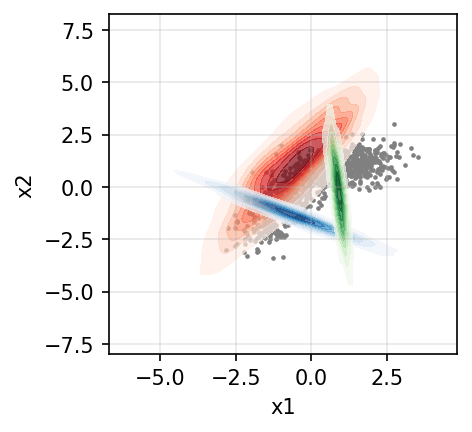

In [31]:
import scipy.stats as stats

hist1 = stats.multivariate_normal(params["mu1"], params["sigma1"]).rvs(size=1000)
hist2 = stats.multivariate_normal(params["mu2"], params["sigma2"]).rvs(size=1000)
hist3 = stats.multivariate_normal(params["mu3"], params["sigma3"]).rvs(size=1000)

fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
sns.scatterplot(x="x1", y="x2", data=df, s=5, linewidth=0, ax=ax, color="grey")
sns.kdeplot(x=hist1[:, 0], y=hist1[:, 1], ax=ax, cmap="Reds", fill=True, alpha=0.7)
sns.kdeplot(x=hist2[:, 0], y=hist2[:, 1], ax=ax, cmap="Blues", fill=True, alpha=0.7)
sns.kdeplot(x=hist3[:, 0], y=hist3[:, 1], ax=ax, cmap="Greens", fill=True, alpha=0.7)
ax.grid(alpha=0.3)



In [128]:
from scipy.special import logsumexp

X = df.values

def E_step(X, params, draw=False):
  LogLikelihood = A = np.log([
      stats.multivariate_normal(params["mu1"], params["sigma1"]).pdf(X), 
      stats.multivariate_normal(params["mu2"], params["sigma2"]).pdf(X),
      stats.multivariate_normal(params["mu3"], params["sigma3"]).pdf(X)
  ])
  logPrior = B = np.log([1 - params["phi_1"] - params["phi_2"], params["phi_1"], params["phi_2"]])
  logPosterior = D = logPrior + LogLikelihood.T
  RealSoftMax = C = logsumexp(logPosterior, axis=1)
  probabilities = np.exp(logPosterior - np.array([RealSoftMax]).T)
  
  if draw:
    hist1 = stats.multivariate_normal(params["mu1"], params["sigma1"]).rvs(size=1000)
    hist2 = stats.multivariate_normal(params["mu2"], params["sigma2"]).rvs(size=1000)
    hist3 = stats.multivariate_normal(params["mu3"], params["sigma3"]).rvs(size=1000)

    fig, axes = plt.subplots(figsize=(6, 3), dpi=150, ncols=2)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], linewidth=0, ax=axes[0], s=3, alpha=1, color="grey")
    sns.kdeplot(x=hist1[:, 0], y=hist1[:, 1], ax=axes[0], cmap="Reds", fill=True, alpha=0.5)
    sns.kdeplot(x=hist2[:, 0], y=hist2[:, 1], ax=axes[0], cmap="Blues", fill=True, alpha=0.5)
    sns.kdeplot(x=hist3[:, 0], y=hist3[:, 1], ax=axes[0], cmap="Greens", fill=True, alpha=0.5)
    axes[0].grid(alpha=0.3)
    axes[1].grid(alpha=0.3)
    axes[1].legend().remove()
    axes[0].set_xlim(-4, 4)
    axes[1].set_xlim(-4, 4)
    axes[0].set_ylim(-4, 4)
    axes[1].set_ylim(-4, 4)
    plt.show()

  return RealSoftMax, probabilities


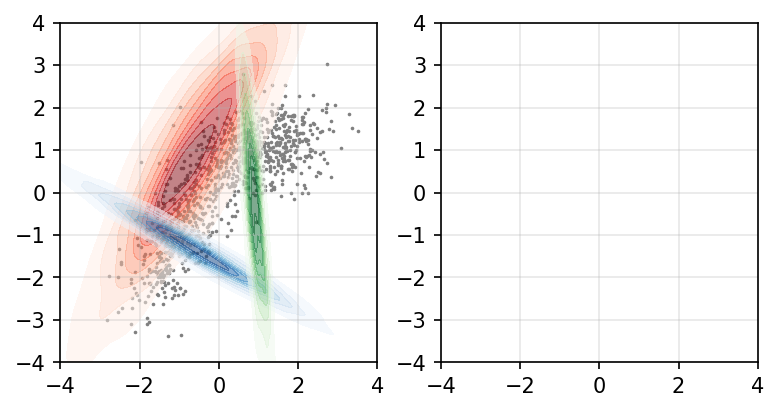

In [129]:
total_prob, probabilities = E_step(X, params, draw=True)

In [130]:
def M_step(X, params, probabilities):
  prob_1 = probabilities[:, 0]
  prob_2 = probabilities[:, 1]
  prob_3 = probabilities[:, 2]

  # Вычисление новых значений
  # Пропорция = prior
  phi_1 = prob_1.sum() / len(X)
  phi_2 = prob_2.sum() / len(X)

  # Среднее
  mu1 = prob_1.dot(X) / np.sum(prob_1)
  mu2 = prob_2.dot(X) / np.sum(prob_2)
  mu3 = prob_3.dot(X) / np.sum(prob_3)

  # Дисперсия
  sigma1 = (X - mu1).T.dot((X - mu1) * np.array([prob_1]).T) / np.sum(prob_1)
  sigma2 = (X - mu2).T.dot((X - mu2) * np.array([prob_2]).T) / np.sum(prob_2)
  sigma3 = (X - mu3).T.dot((X - mu3) * np.array([prob_3]).T) / np.sum(prob_3)
  
  return {
      "phi_1" : phi_1,
      "phi_2" : phi_2,
      "mu1" : mu1, "mu2" : mu2,
      "mu3" : mu3,
      "sigma1": sigma1, "sigma2": sigma2, "sigma3": sigma3,
  }

In [131]:
def run_EM(X, params, draw=False):
    import imageio
    avg_allprob = []

    while True:
        allprob, probabilities = E_step(X, params, draw=draw)
        avg_allprob.append(np.mean(allprob))
        if len(avg_allprob) > 2 and abs(avg_allprob[-1] - avg_allprob[-2]) < 0.00001:
            break
        params = M_step(X, params, probabilities)
        
    loglikelihood, probabilities = E_step(X, params)
    forecasts = np.argmax(probabilities, axis=1)
    return forecasts, probabilities, avg_allprob

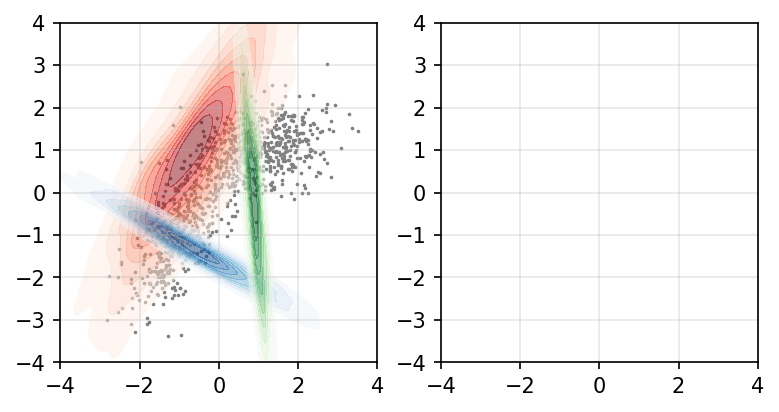

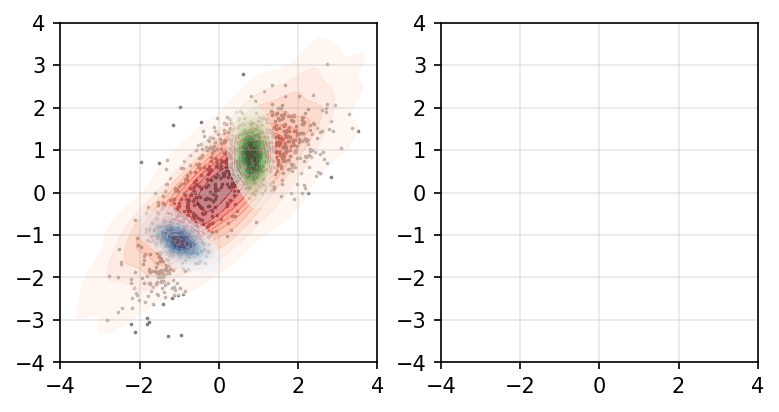

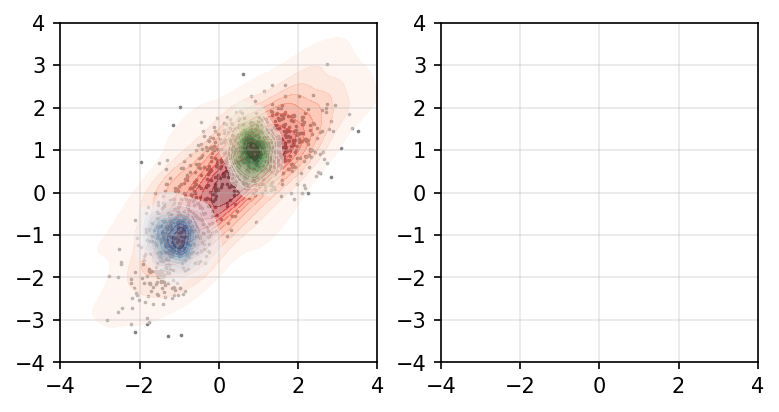

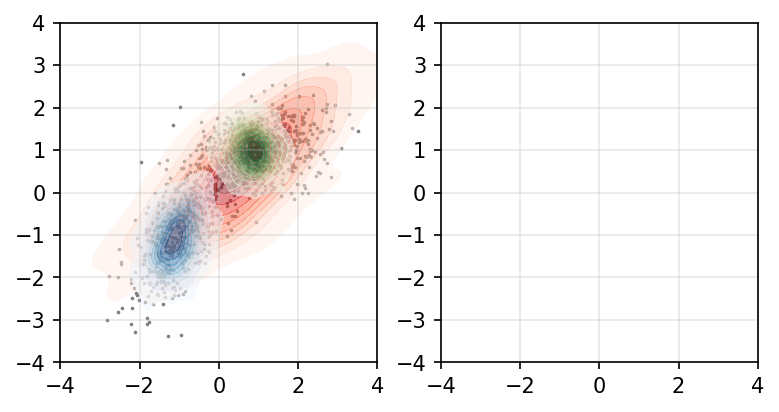

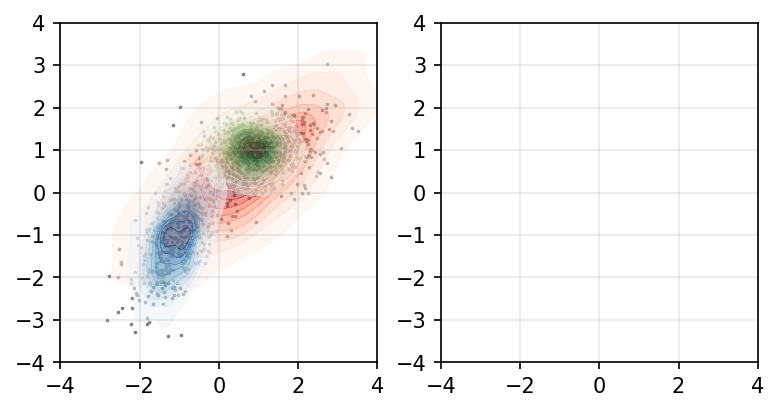

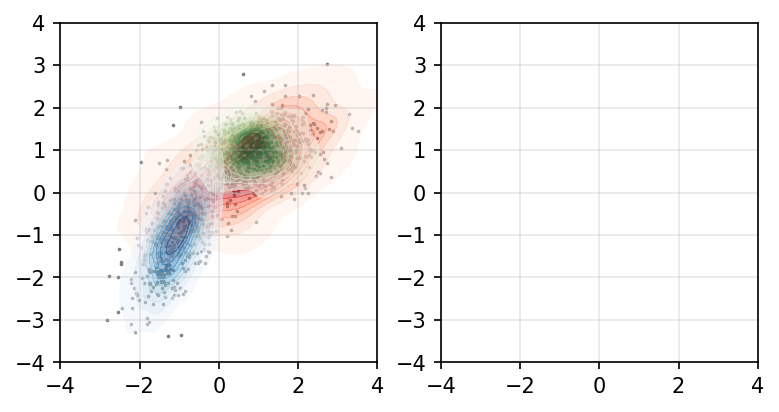

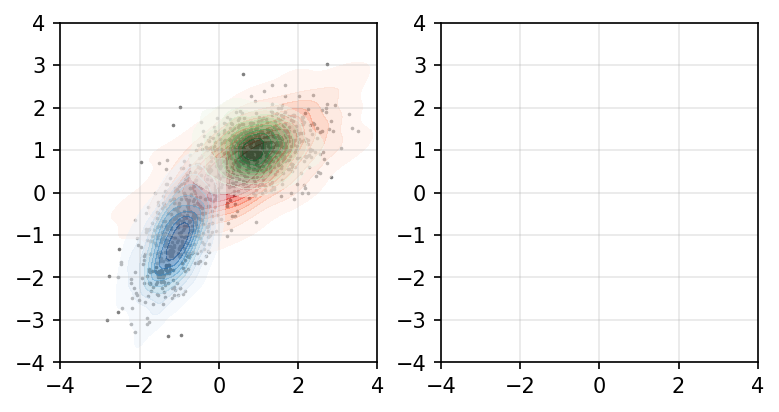

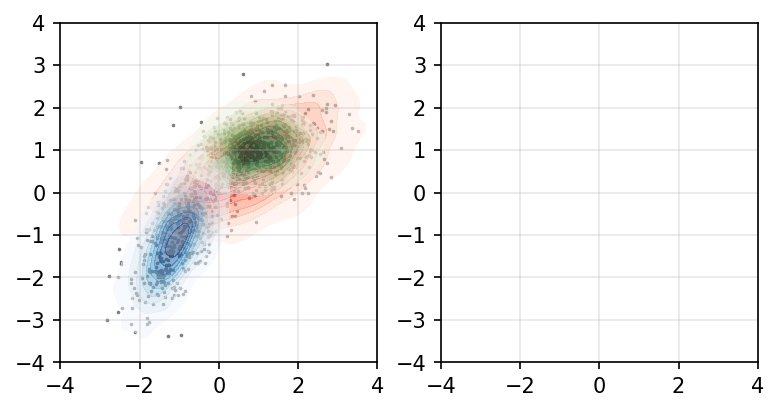

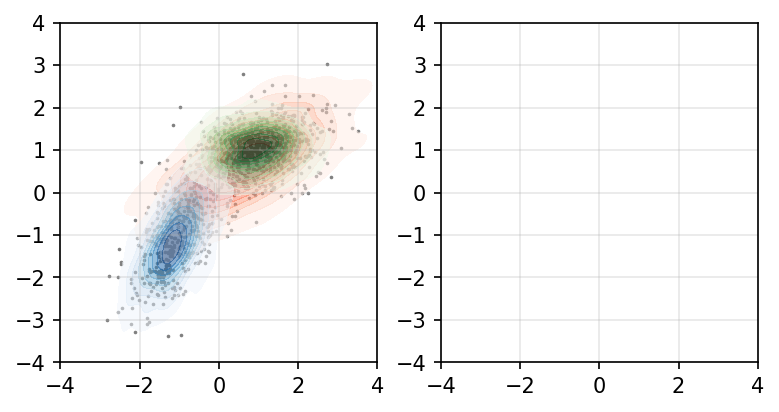

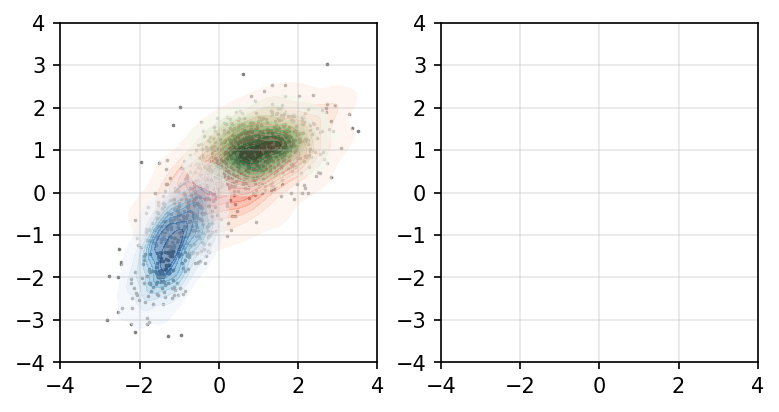

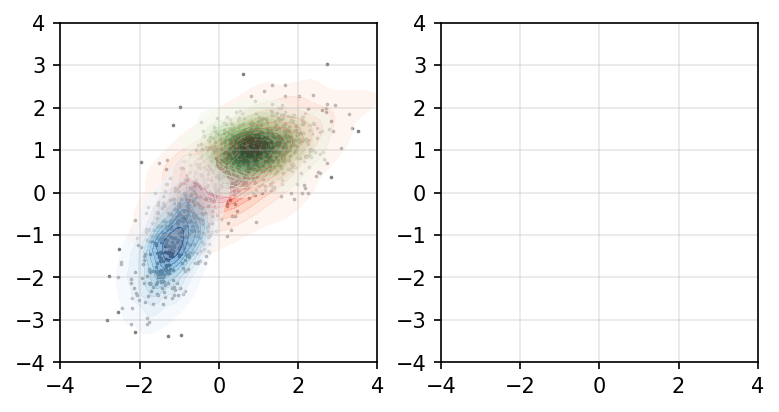

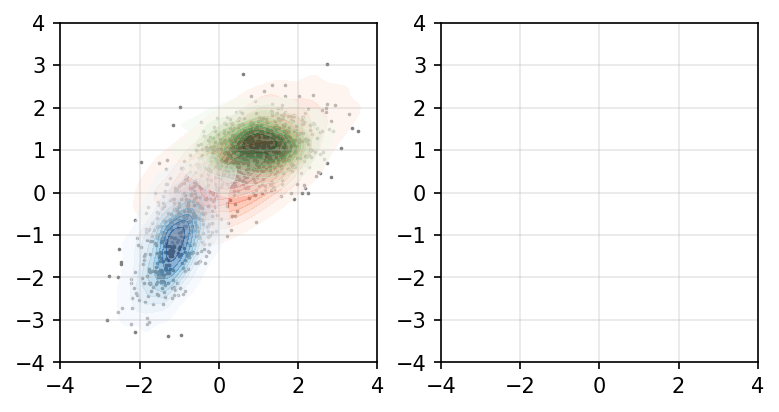

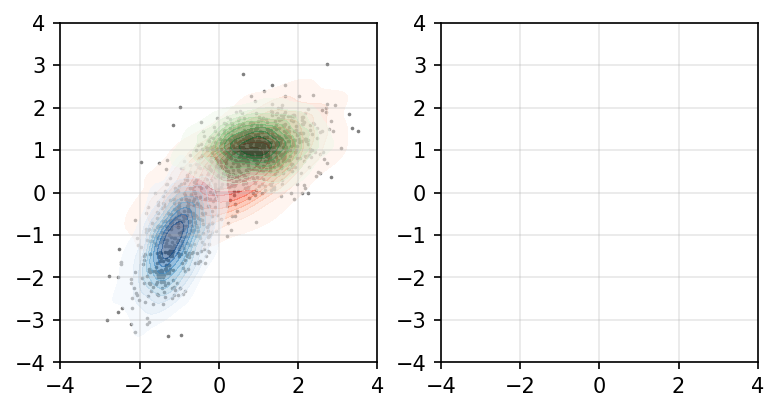

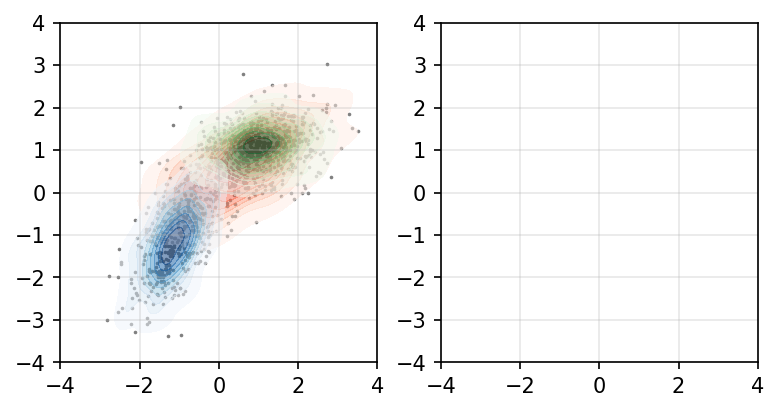

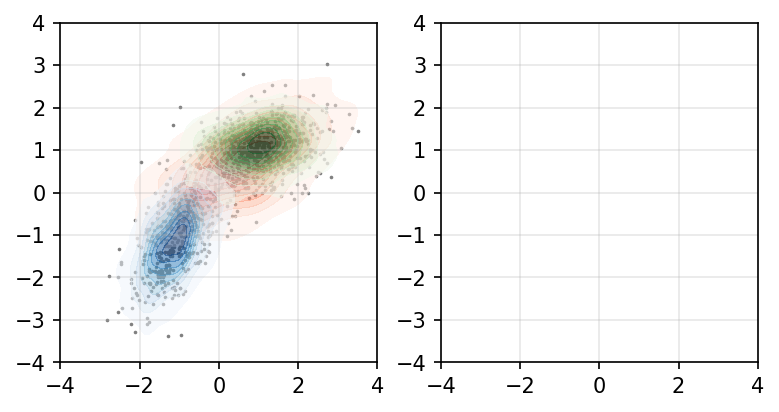

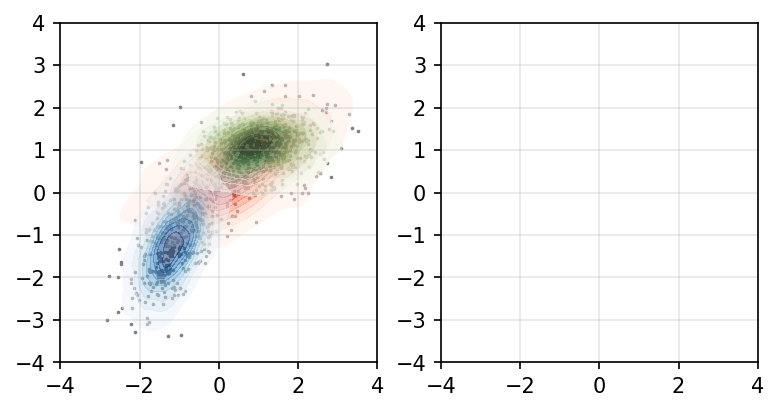

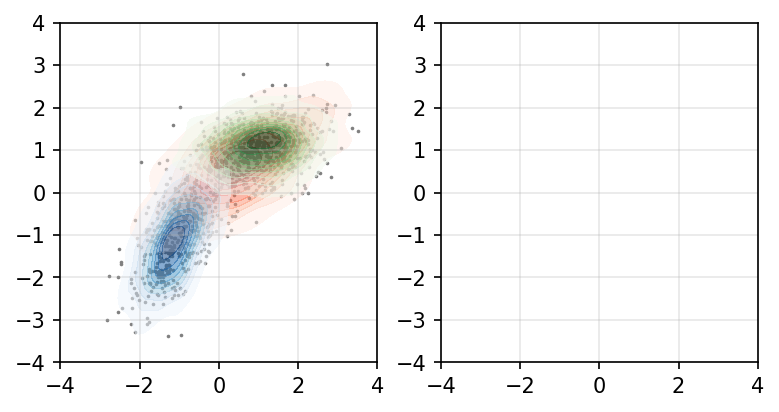

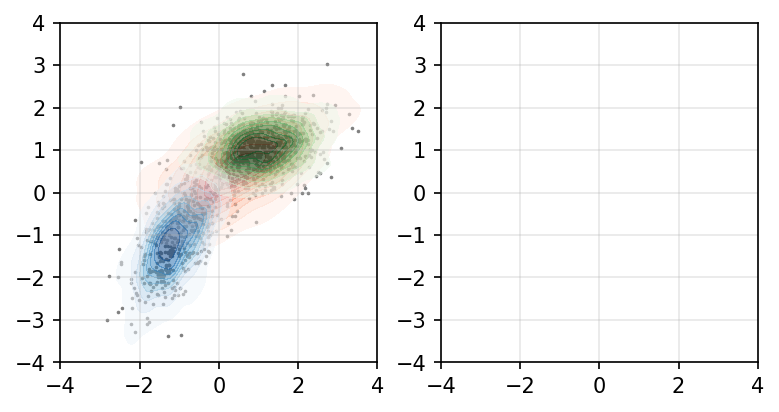

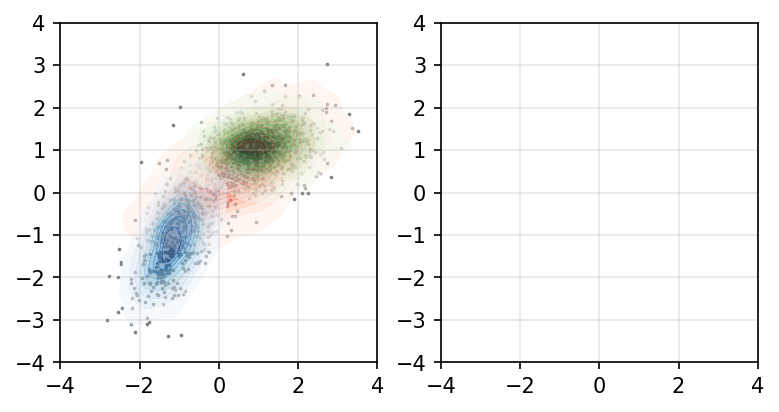

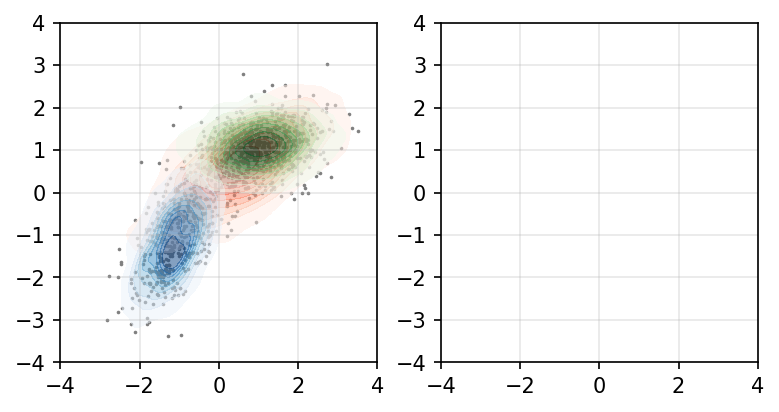

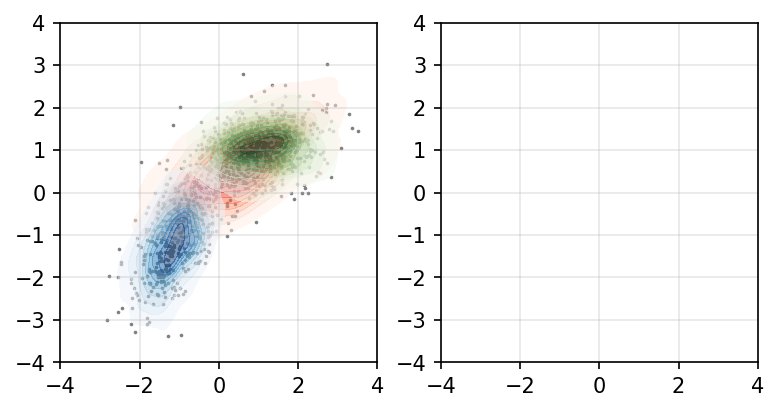

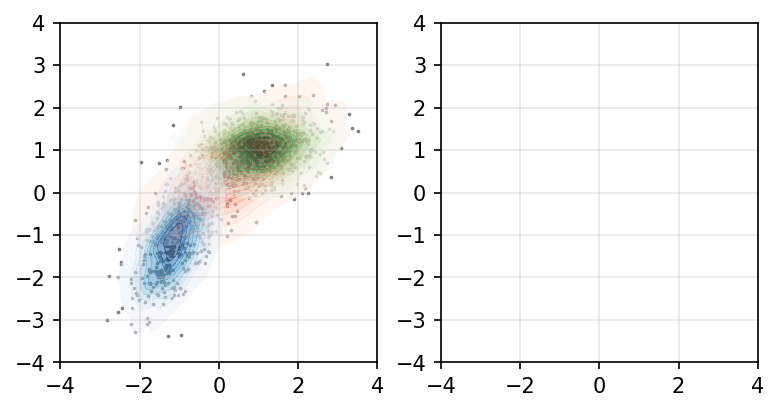

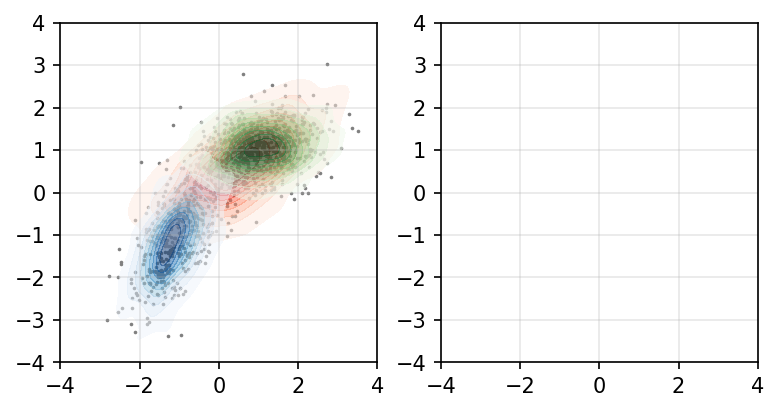

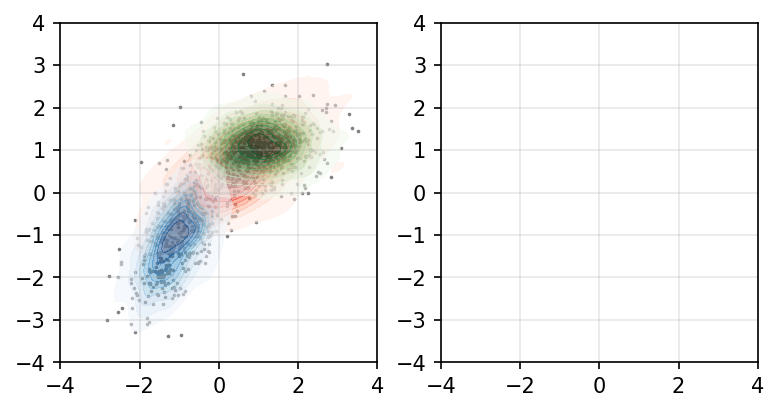

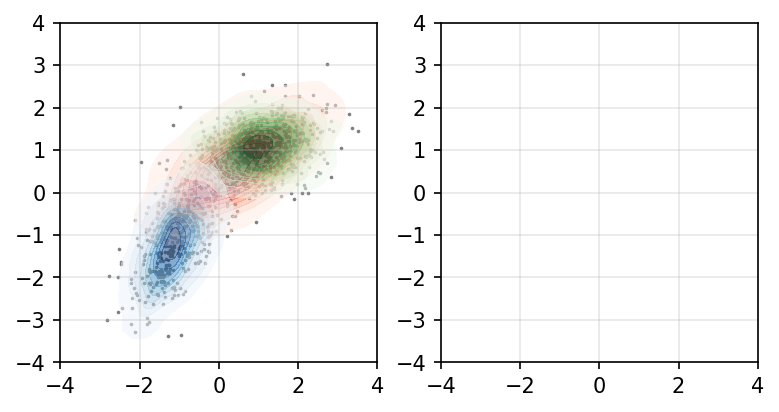

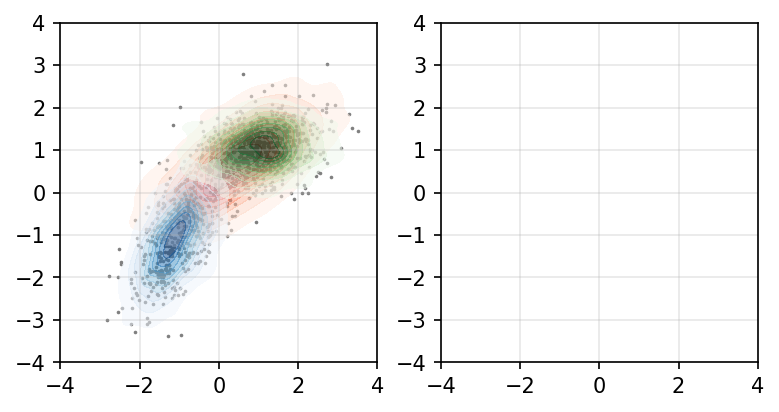

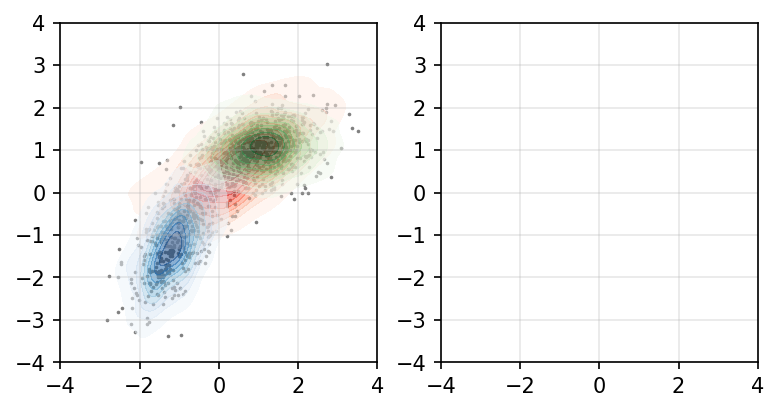

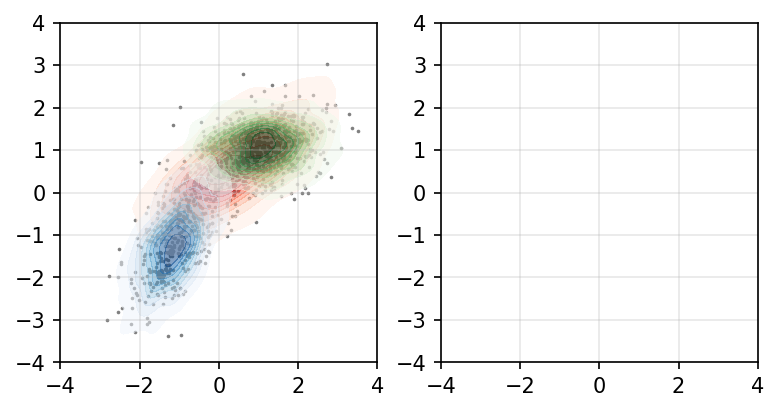

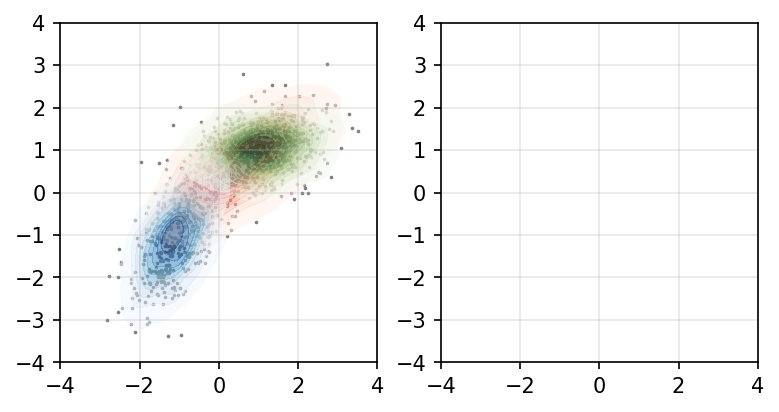

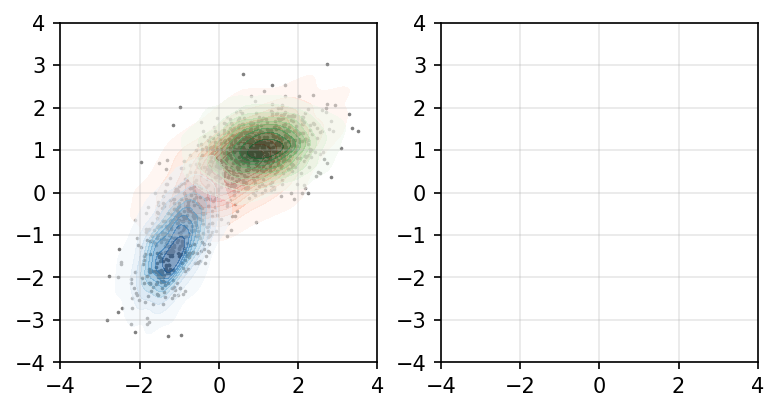

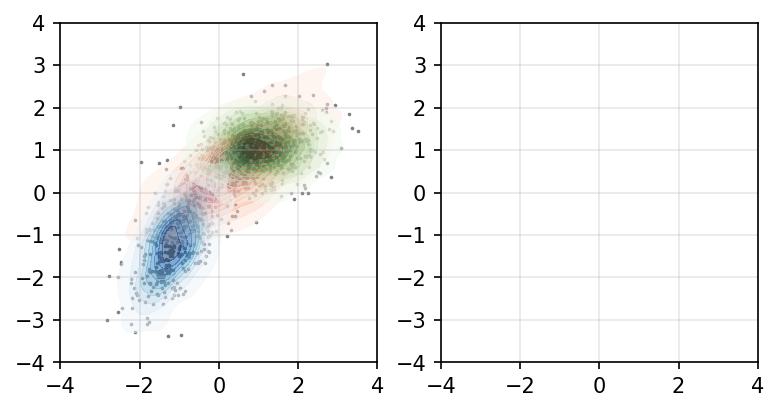

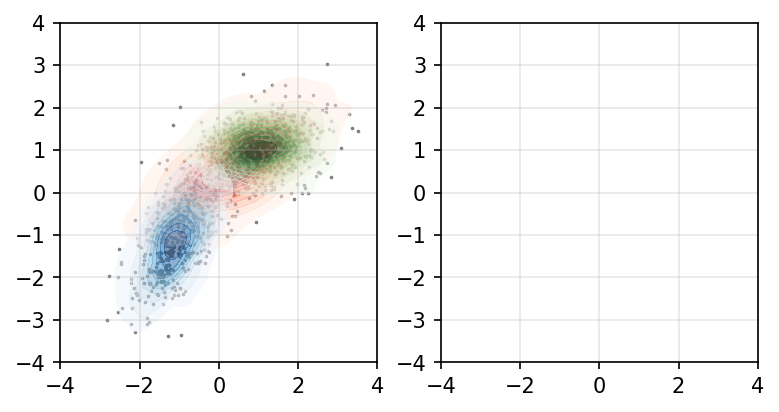

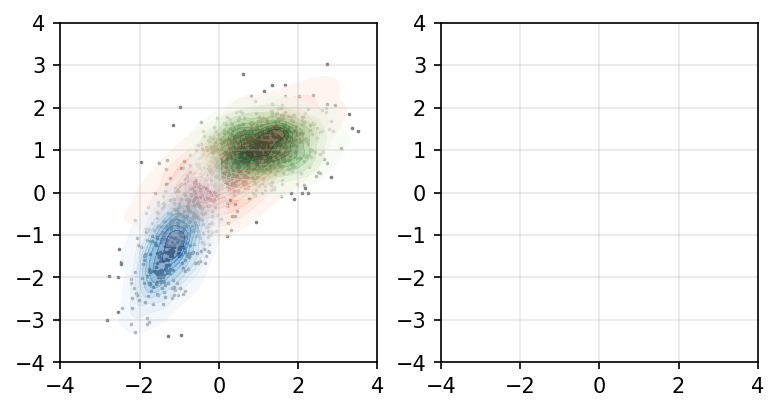

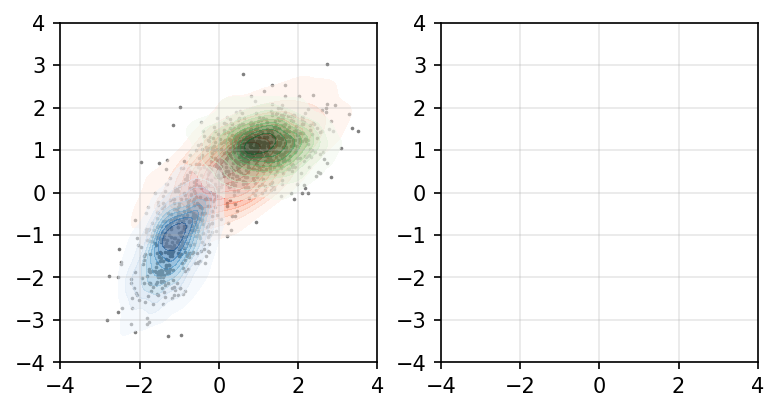

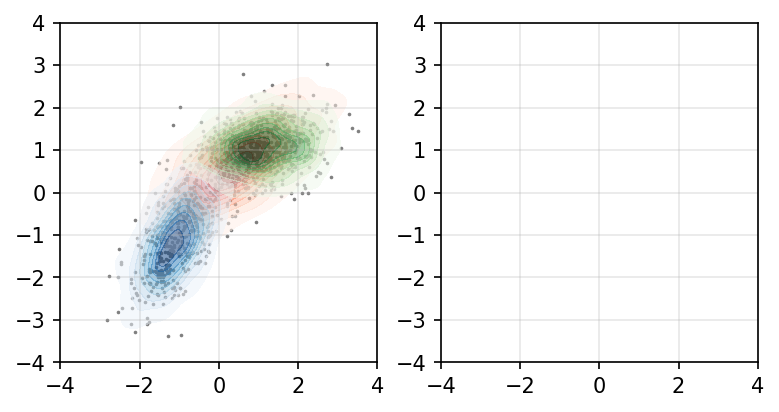

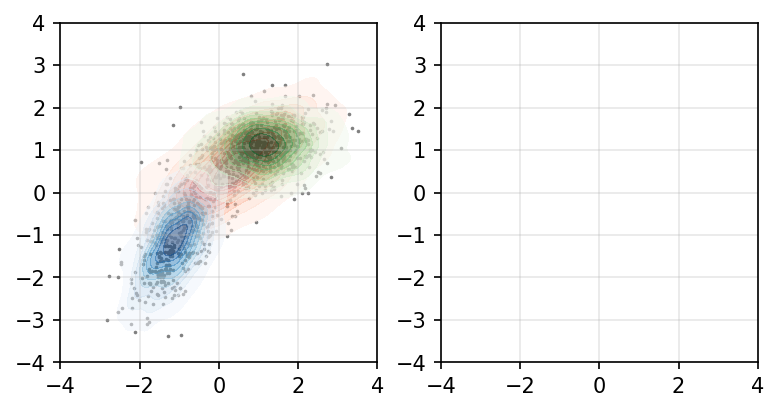

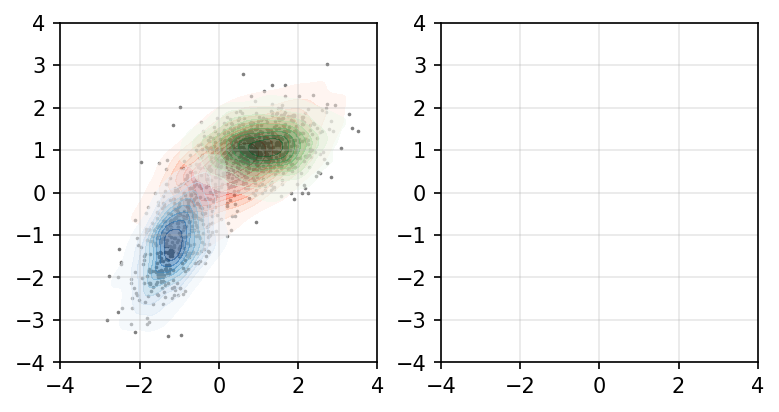

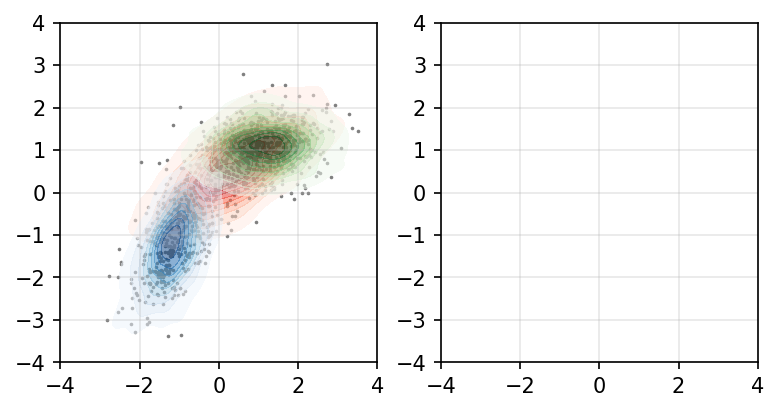

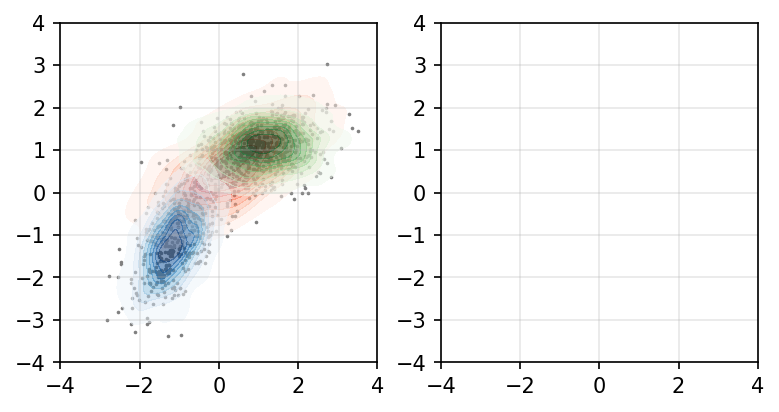

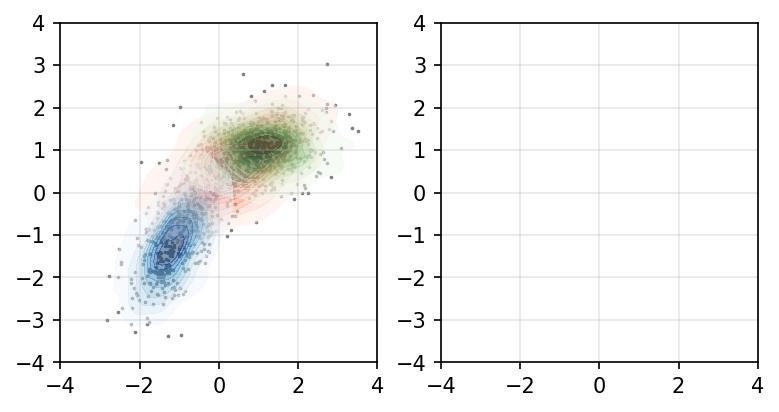

In [132]:
pred, prob, allprob = run_EM(X, params, draw=True)

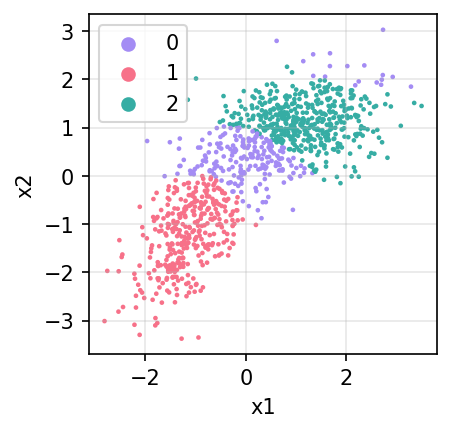

In [133]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
sns.scatterplot(x="x1", y="x2", data=df, s=5, linewidth=0, ax=ax, hue=pred,
                palette={0: sns.color_palette("husl", n_colors=4)[-1],
                         1: sns.color_palette("husl", n_colors=4)[0],
                         2: sns.color_palette("husl", n_colors=4)[2]})
ax.grid(alpha=0.3)